---
### **Activation Function**
---
- **The activation function is applied to the output of a neuron (or layer of neurons), which modifies outputs.**
- **We use activation functions because if the activation function itself is nonlinear, it allows for neural networks with usually two or more hidden layers to map nonlinear functions.**
- **Neural network will have two types of activation functions. The first will be the activation function used in hidden layers, and the second will be used in the output layer.**
- **The purpose this activation function serves is to mimic a neuron “firing” or “not firing” based on input information.**
- **An Activation Function decides whether a neuron should be activated or not.**
- **Similar to the brain which use the external signals and inputs and process them to decide wether these information is important to trigger stimuli or not, the activation function is also take same steps**
----

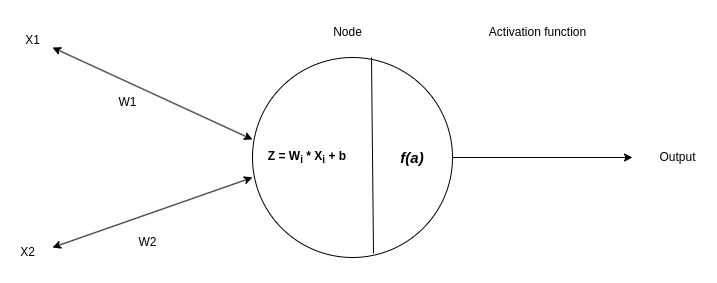

---
#### **1. The Step Function**
---
- **In a single neuron, if the** ***weights · inputs + bias*** **results in a value greater than 0, the neuron will fire and output a 1; otherwise, it will output a 0.**
- **It cannot provide multi-value outputs—for example, it cannot be used for multi-class classification problems.**
- **The gradient of the step function is zero, which causes a hindrance in the backpropagation process**


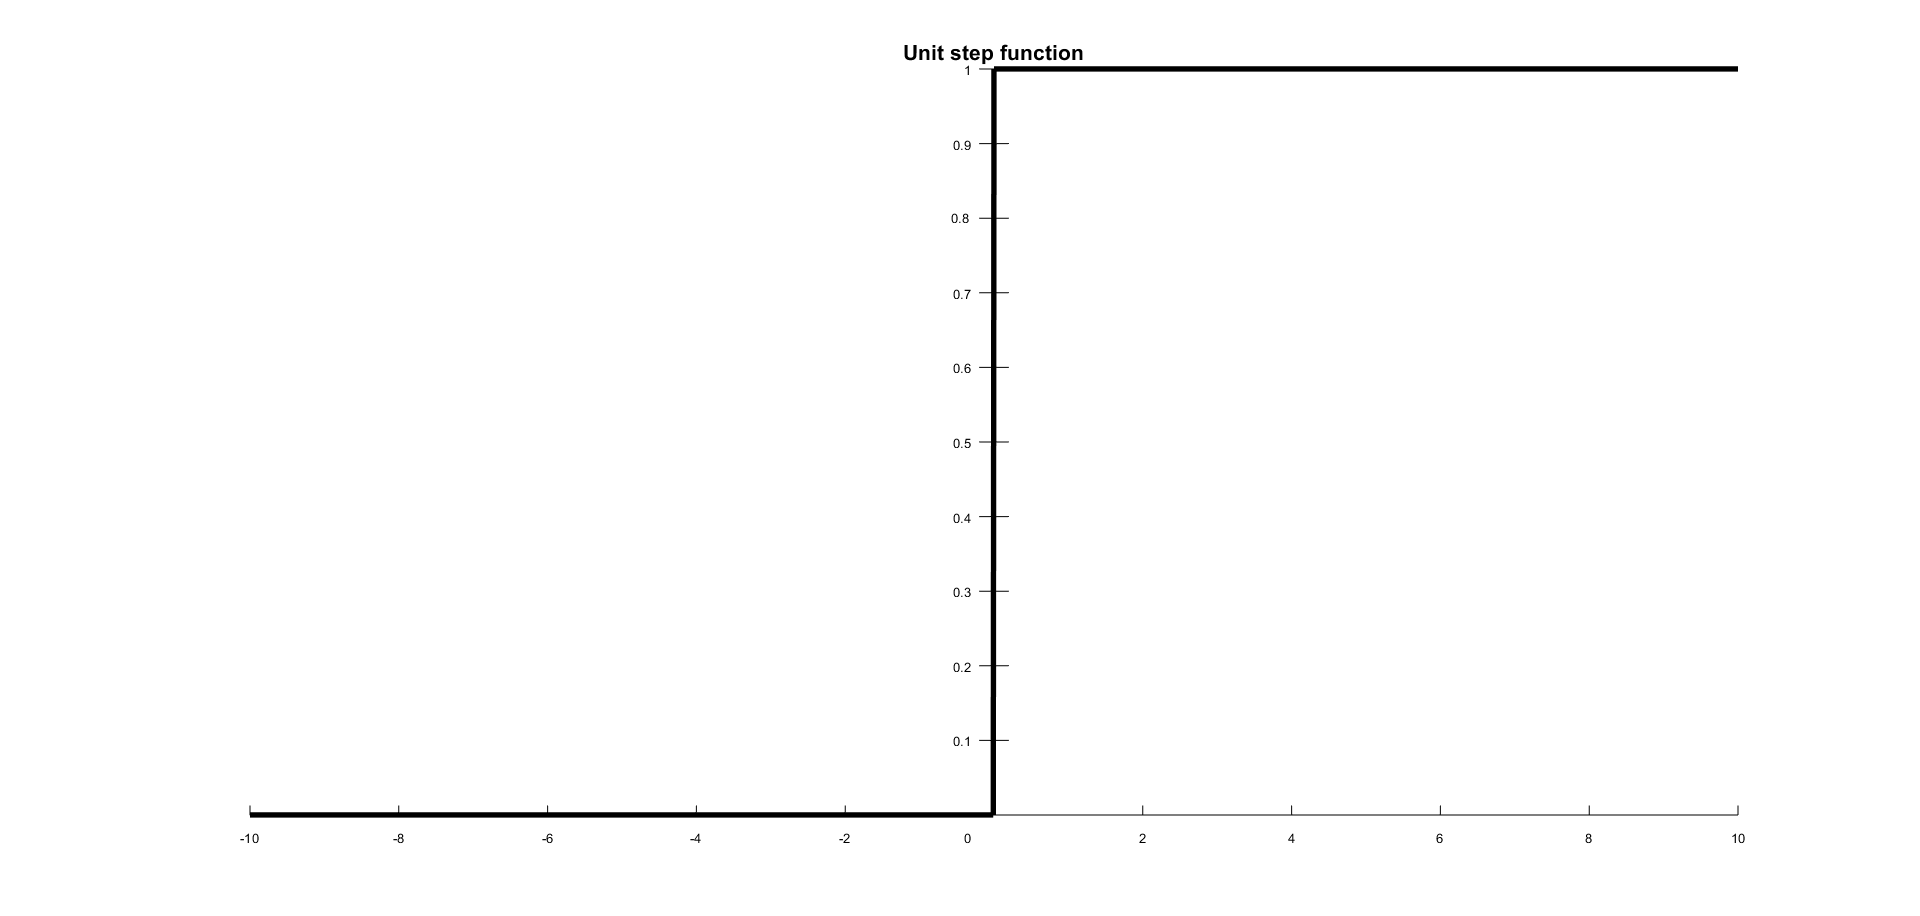

Source Image for Step Function:[V7](https://www.v7labs.com/blog/neural-networks-activation-functions)

---
#### **2. The Linear Function**
---
- This activation function is usually applied to the last layer’s output in the case of a regression model — a model that outputs a scalar value instead of a classification.

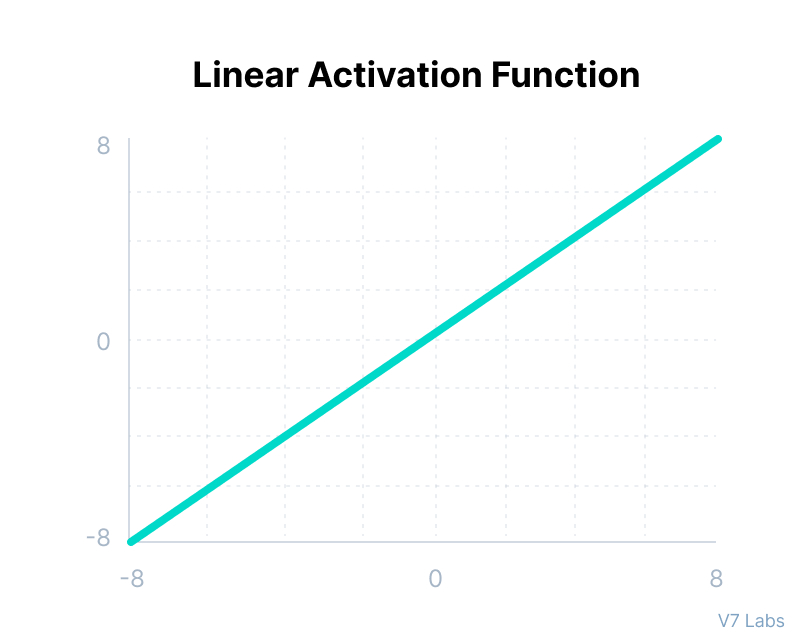

Source Image for Linear Function:[V7](https://www.v7labs.com/blog/neural-networks-activation-functions)

---
#### **3. ReLU**
---
- The ReLU activation function is differentiable at all points except at zero. For values greater than zero, we just consider the max of the function. 
- $f(x) = max$ $\left\{{0},{z}\right\}$

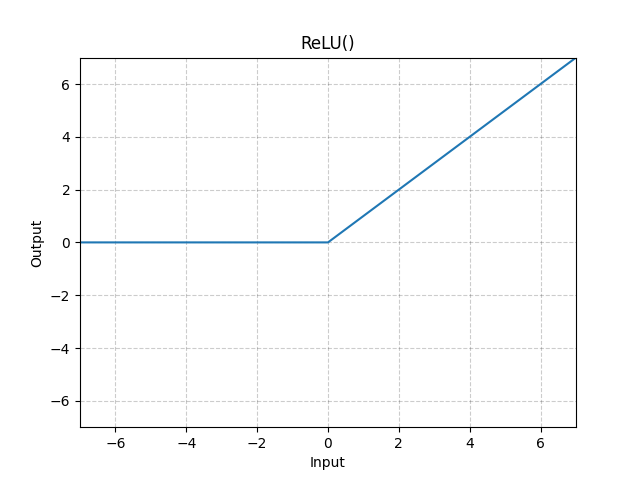

Source Image for Linear Function:[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

In [2]:
li = []
inputs = [1, 0, 0, -1, -3]
for i in(inputs):
    if i > 0:
        li.append(i)
    else:
        li.append(0)
print(li)

[1, 0, 0, 0, 0]


In [3]:
lis = []
for i in(inputs):
    lis.append(max(0, i))
print(lis)

[1, 0, 0, 0, 0]


In [4]:
class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [5]:
class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [10]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [11]:
X, y = spiral_data(samples=100, classes=3)

In [12]:
dense = DenseLayer(2, 3)
dense.forward(X)
print(dense.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


In [17]:
dense = DenseLayer(2, 3)
relu = ReLU()
dense.forward(X)
relu.forward(dense.output)
print(relu.output[:5])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


---
### **4. Softmax**
---
- Rectified linear unit is unbounded, not normalized with other units, and exclusive.
- To address this lack of context, the softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and produce a normalized distribution of probabilities for our classes.
- $$ Softmax_{i,j} = \frac{e^{z_i,j}}{{\sum_{l=1}^{L} e^{z_i,l}}}$$
- Both the numerator and the denominator of the Softmax function contain $e$ raised to the power of $z$, where $z$, given indices, means a singular output value — the index $i$ means the current sample and the index $j$ means the current output in this sample. 

The numerator exponentiates the current
output value and the denominator takes a sum of all of the exponentiated outputs for a given
sample.

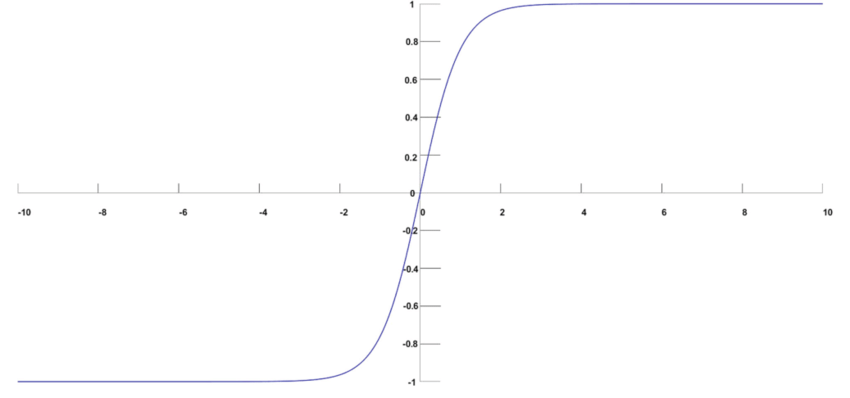

Source Image for SoftMax:[Pytorch](https://botpenguin.com/glossary/softmax-function)

---
##### **I. Exponentiation**
---

In [18]:
layer_outputs = [4.8, 1.21, 2.385]

In [19]:
E = 2.71828182846

In [20]:
exp_values = []
for i in layer_outputs:
    exp_values.append(E**i)
print('exponentiated values:')
print(exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


- **Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative values.**
- **The exponential function is a monotonic function. This means that, with higher input values, outputs are also higher, so we won’t change the predicted class after applying it while making sure that we get non-negative values.**
- **It also adds stability to the result as the normalized exponentiation is more about the difference between numbers than their magnitudes.**

---
##### **II. Normalization**
---

In [21]:
exp_sum = sum(exp_values)
norm_values = []
for i in exp_values:
    norm_values.append(i/exp_sum)
print('Normalized exponentiated values:')
print(norm_values)
print('Sum of normalized values:', sum(norm_values))

Normalized exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized values: 1.0


In [22]:
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]
# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print('exponentiated values:')
print(exp_values)
# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print('normalized exponentiated values:')
print(norm_values)
print('sum of normalized values:', np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


---
##### **III. Batches of Data**
---

- #Get unnormalized probabilities
- exp_values = np.exp(inputs)
- #Normalize them for each sample
- probabilities = exp_values / np.sum(exp_values, axis=1,keepdims =True)

In [25]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                        [8.9, -1.81, 0.2],
                        [1.41, 1.051, 0.026]])
print('Sum without axis')
print(np.sum(layer_outputs))
print('This will be identical to the above since default is None:')
print(np.sum(layer_outputs, axis=None))
### will add all values together

Sum without axis
18.172
This will be identical to the above since default is None:
18.172


In [26]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                        [8.9, -1.81, 0.2],
                        [1.41, 1.051, 0.026]])
print('Sum without axis')
print(np.sum(layer_outputs))
print('This will be identical to the above since default is None:')
print(np.sum(layer_outputs, axis=1))
# Add across the column

Sum without axis
18.172
This will be identical to the above since default is None:
[8.395 7.29  2.487]


In [27]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                        [8.9, -1.81, 0.2],
                        [1.41, 1.051, 0.026]])
print('Sum without axis')
print(np.sum(layer_outputs))
print('This will be identical to the above since default is None:')
print(np.sum(layer_outputs, axis=1, keepdims=True))
# sum across the column and keep their dimensions

Sum without axis
18.172
This will be identical to the above since default is None:
[[8.395]
 [7.29 ]
 [2.487]]


In [31]:
class SoftMax:
    def forward(self, inputs):
        # get exponential values of each
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        prob = exp_values / np.sum(exp_values, axis = 1, keepdims=True)
        self.output = prob

---
##### **Reason of minus of largest from inputs**
- There are two main pervasive challenges with neural networks: “dead neurons” and very large numbers (referred to as “exploding” values).
- “Dead” neurons and enormous numbers can wreak havoc down the line and render a network useless over time. The exponential function used in softmax activation is one of the sources of exploding values.

In [29]:
print(np.exp(-np.inf), np.exp(0))

0.0 1.0


In [32]:
softmax = SoftMax()
softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [33]:
softmax.forward([[-2, -1, 0]])
print(softmax.output) # importance of normalization and exponiantiation

[[0.09003057 0.24472847 0.66524096]]


---
##### **Guidelines**
---
- ReLU activation function should only be used in the hidden layers.
- Sigmoid/Logistic and Tanh functions should not be used in hidden layers as they make the model more susceptible to problems during training (due to vanishing gradients).
- Swish function is used in neural networks having a depth greater than 40 layers
---
##### **Rule of Thumb**
---
- Regression - Linear Activation Function
- Binary Classification—Sigmoid/Logistic Activation Function
- Multiclass Classification—Softmax
- Multilabel Classification—Sigmoid

---
### ***End of this Section***
---